In [ ]:
# Change the number of cores in this code block
# by setting `spark.master` to `local[n]` where
# n is the number of cores
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

import matplotlib.pyplot as plt

conf = pyspark.SparkConf().setAll([('spark.master', 'local[4]'),
                                   ('spark.app.name', 'Data Prep')])
spark = SparkSession.builder.config(conf=conf).getOrCreate()

In [13]:
ratings_df = spark.read.csv("file:///home/work/data/ratings.csv", inferSchema=True, header=True)
ratings_df.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)



In [14]:
from pyspark.sql.functions import *
ratings_df = ratings_df.withColumn('date',from_unixtime(col("timestamp"))).withColumn('year',year("date"))


In [15]:
ratings_df.show()

+------+-------+------+----------+-------------------+----+
|userId|movieId|rating| timestamp|               date|year|
+------+-------+------+----------+-------------------+----+
|     1|    296|   5.0|1147880044|2006-05-17 15:34:04|2006|
|     1|    306|   3.5|1147868817|2006-05-17 12:26:57|2006|
|     1|    307|   5.0|1147868828|2006-05-17 12:27:08|2006|
|     1|    665|   5.0|1147878820|2006-05-17 15:13:40|2006|
|     1|    899|   3.5|1147868510|2006-05-17 12:21:50|2006|
|     1|   1088|   4.0|1147868495|2006-05-17 12:21:35|2006|
|     1|   1175|   3.5|1147868826|2006-05-17 12:27:06|2006|
|     1|   1217|   3.5|1147878326|2006-05-17 15:05:26|2006|
|     1|   1237|   5.0|1147868839|2006-05-17 12:27:19|2006|
|     1|   1250|   4.0|1147868414|2006-05-17 12:20:14|2006|
|     1|   1260|   3.5|1147877857|2006-05-17 14:57:37|2006|
|     1|   1653|   4.0|1147868097|2006-05-17 12:14:57|2006|
|     1|   2011|   2.5|1147868079|2006-05-17 12:14:39|2006|
|     1|   2012|   2.5|1147868068|2006-0

In [26]:
ratings_pd = ratings_df.groupBy("year").count().sort('count').toPandas()

In [31]:
ratings_pd

,year,count
0,1995,3
1,1998,272099
2,2014,478270
3,2013,515684
4,1997,626202
5,2012,635208
6,2011,676498
7,2002,776654
8,2010,792436
9,2009,810127


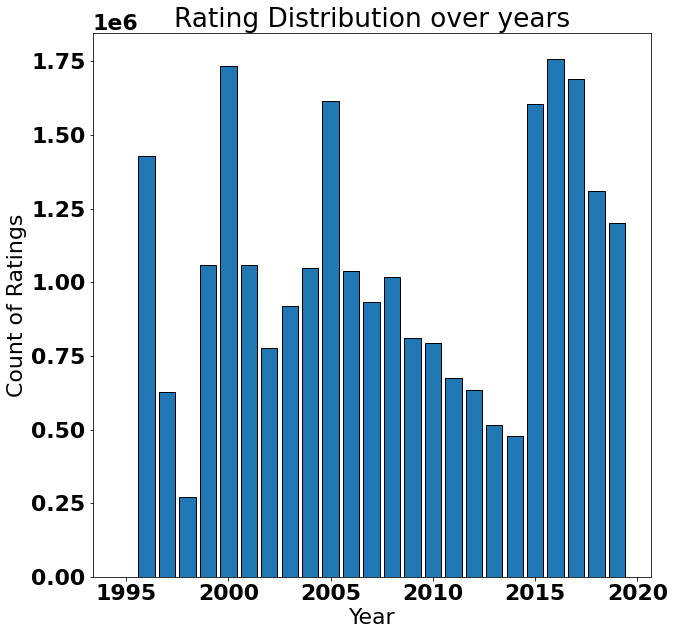

In [33]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

plt.figure(figsize=(10,10))
plt.bar(ratings_pd["year"], ratings_pd["count"],edgecolor='k')
plt.title("Rating Distribution over years")
plt.ylabel("Count of Ratings")
plt.xlabel("Year")
ax = plt.gca()
#plt.savefig('../data/rating_dist.png')

In [ ]:
#spark.stop()